In [ ]:
# Instalar pacotes
install.packages(c("tidyverse", "lubridate", "forecast", "ggthemes","outliers"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
# Carregar pacotes
library(tidyverse)
library(lubridate)
library(forecast)
library(ggthemes)
library(outliers)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# Definir quantidade de registros
n <- 1000

# Criar dataset
set.seed(123)  # para resultados reproduzíveis
dados <- tibble(
  Data = sample(seq(ymd('2023-01-01'), ymd('2023-12-31'), by = 'day'), n, replace = TRUE),
  Item = sample(c('Jogos', 'Comida', 'Eletrônicos', 'Bebidas', 'Brinquedos'), n, replace = TRUE),
  Total = round(runif(n, min = 50, max = 500), 2)
)

# Visualizar as primeiras linhas
head(dados)

Data,Item,Total
<date>,<chr>,<dbl>
2023-06-28,Brinquedos,198.66
2023-01-14,Bebidas,399.54
2023-07-14,Brinquedos,428.21
2023-11-02,Brinquedos,441.76
2023-04-28,Jogos,478.87
2023-10-26,Comida,222.78


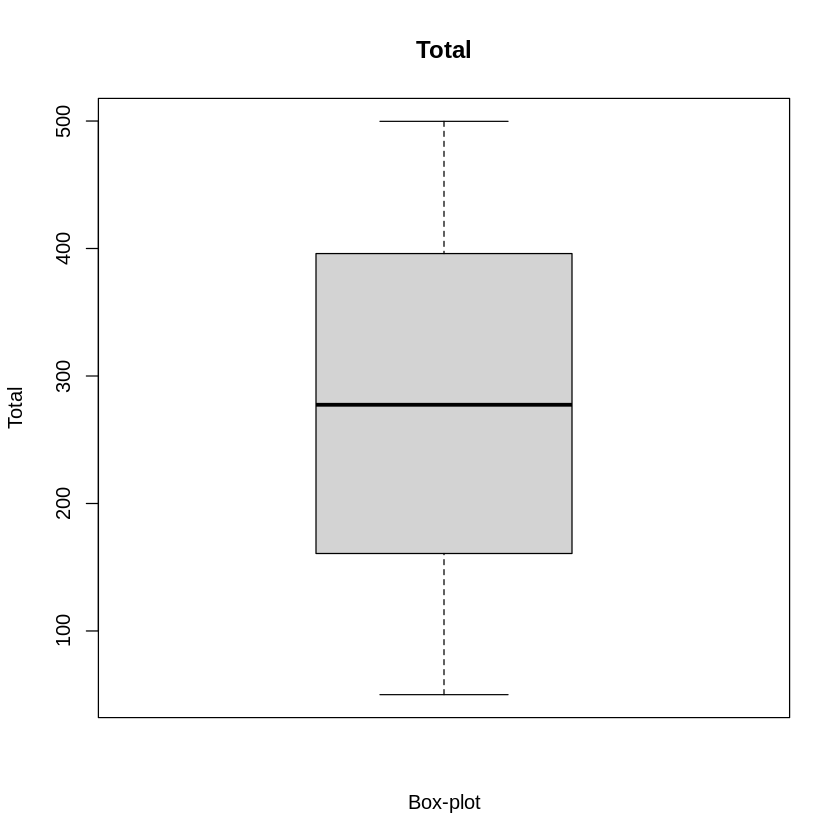

In [ ]:
# Boxplot simples do valor das compras
boxplot(dados$Total, main = "Total",xlab = "Box-plot", ylab = "Total")

In [ ]:
# Aplicar a função para detectar outlier
outlier(dados$Total)

#Resumo das informações
summary(dados$Total)

[1] 50.03

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.03  160.82  277.44  276.96  395.94  499.77 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.03  160.82  277.44  276.96  395.94  499.77 

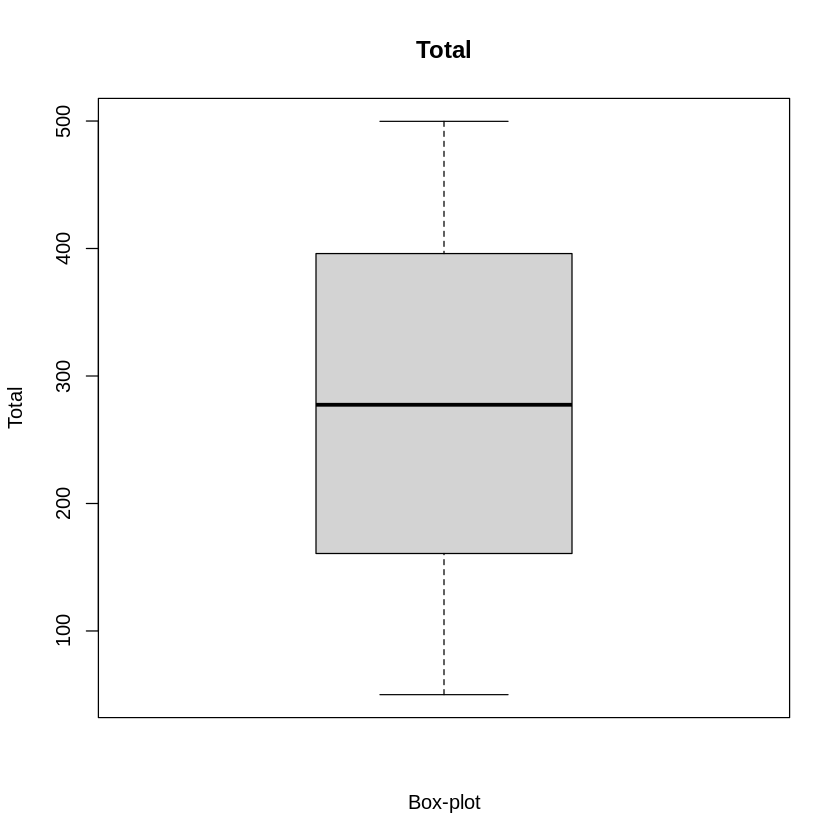

In [ ]:
#Removendo Outliers
Total = rm.outlier(dados$Total,fill = FALSE, median = FALSE, opposite = FALSE)

boxplot(dados$Total, main = "Total",xlab = "Box-plot", ylab = "Total")

#Resumo das informações
summary(dados$Total)

In [ ]:
# Calcular as estatísticas
media <- mean(dados$Total)
mediana <- median(dados$Total)
desvio_padrao <- sd(dados$Total)

# Exibir formatado com 2 casas decimais
cat("Média: ", format(round(media, 2), nsmall = 2), "\n")
cat("Mediana: ", format(round(mediana, 2), nsmall = 2), "\n")
cat("Desvio Padrão: ", format(round(desvio_padrao, 2), nsmall = 2), "\n")

Média:  276.96 
Mediana:  277.44 
Desvio Padrão:  132.51 


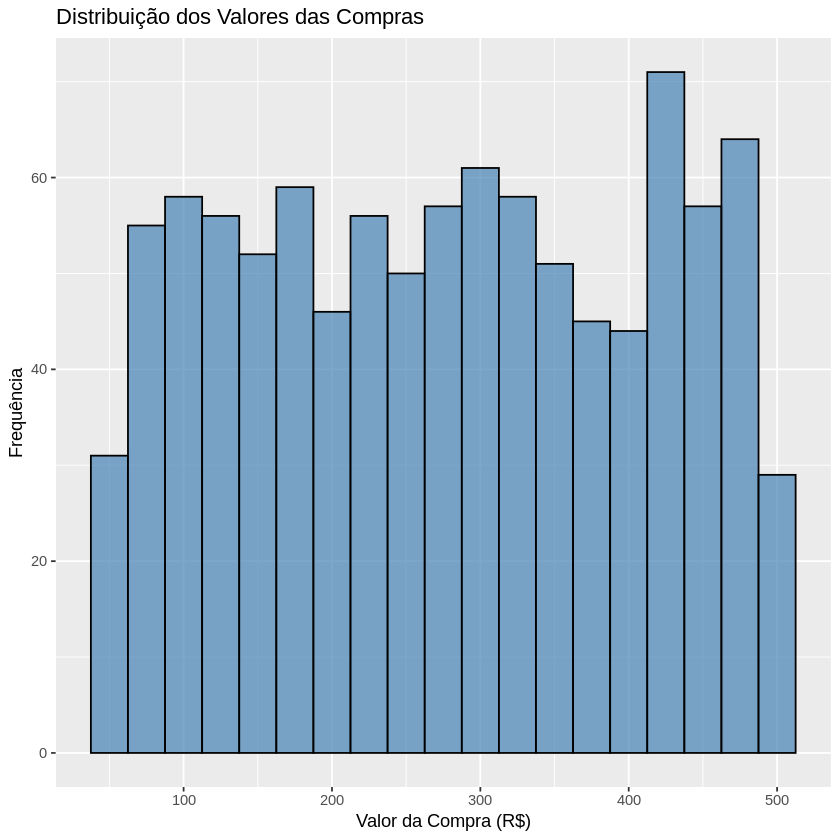

In [ ]:
# Criar histograma
ggplot(dados, aes(x = Total)) +
  geom_histogram(binwidth = 25, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribuição dos Valores das Compras",x = "Valor da Compra (R$)", y = "Frequência")

`geom_smooth()` using formula = 'y ~ x'


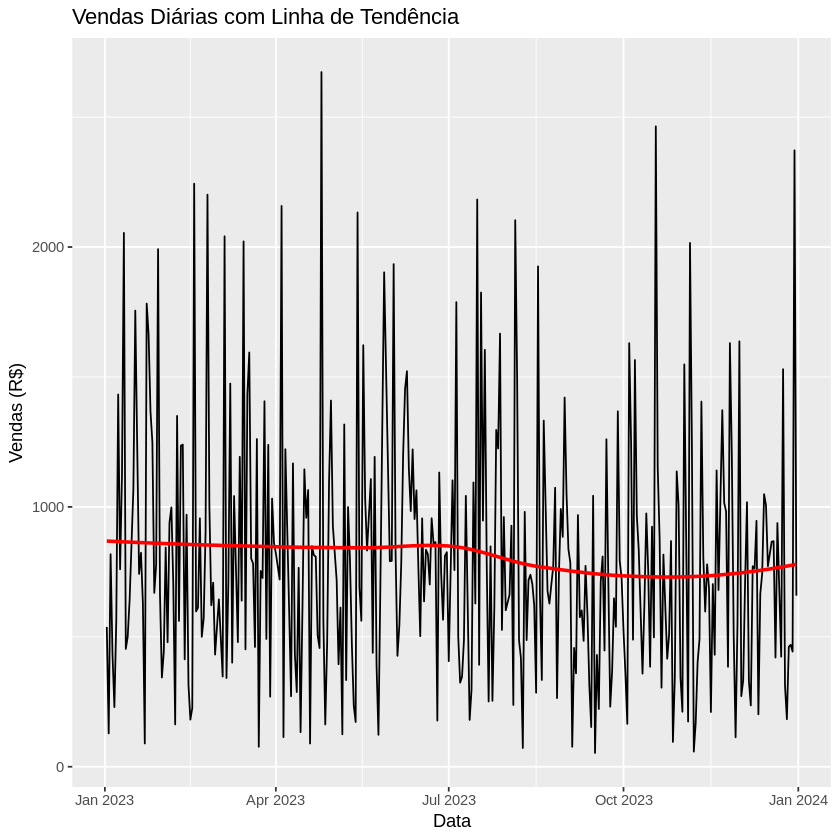

In [ ]:
# Agrupar por data e somar as vendas
vendas_diarias <- dados %>%
  group_by(Data) %>%
  summarise(Vendas = sum(Total))

# Criar o gráfico de série temporal
ggplot(vendas_diarias, aes(x = Data, y = Vendas)) +
  geom_line() +
  geom_smooth(method = "loess", se = FALSE, color = "red") + # Adiciona linha de tendência
  labs(title = "Vendas Diárias com Linha de Tendência", x = "Data", y = "Vendas (R$)")

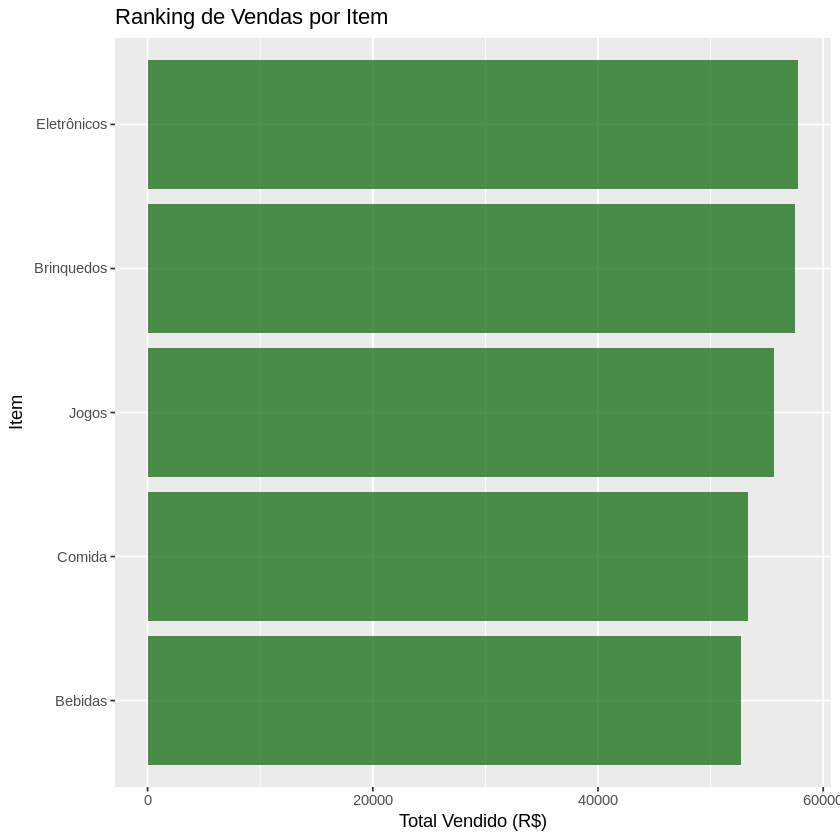

In [ ]:
# Agrupar e somar vendas por Item
ranking_itens <- dados %>%
  group_by(Item) %>%
  summarise(Total_Vendido = sum(Total)) %>%
  arrange(desc(Total_Vendido)) # Colocar em ordem descrescente

# Criar gráfico de barras
ggplot(ranking_itens, aes(x = reorder(Item, Total_Vendido), y = Total_Vendido)) +
  geom_col(fill = "darkgreen", alpha = 0.7) +
  coord_flip() +  # para deixar as barras na horizontal
  labs(title = "Ranking de Vendas por Item", x = "Item", y = "Total Vendido (R$)")

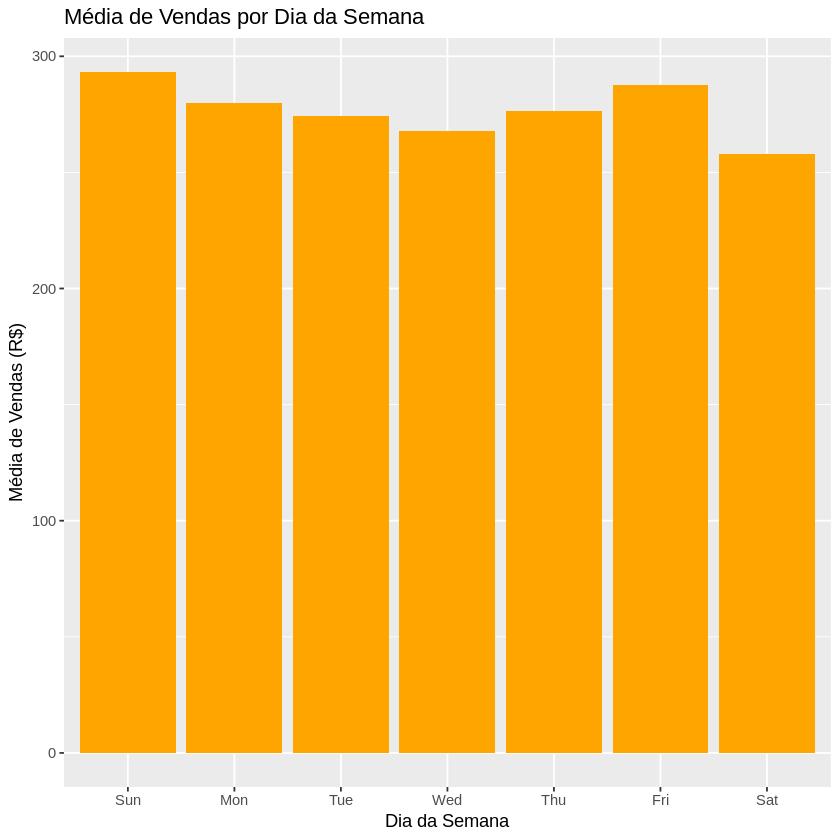

In [ ]:
# Extrair o dia da semana
dados$Dia_da_Semana <- wday(dados$Data, label = TRUE) # label = TRUE para nomes dos dias

# Agrupar por dia da semana e calcular a média das vendas
vendas_por_dia <- dados %>%
  group_by(Dia_da_Semana) %>%
  summarise(Media_Vendas = mean(Total))

# Criar o gráfico de barras
ggplot(vendas_por_dia, aes(x = Dia_da_Semana, y = Media_Vendas)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Média de Vendas por Dia da Semana", x = "Dia da Semana", y = "Média de Vendas (R$)")